In [ ]:
### neural networks (deep learning)
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.5 MB/s eta 0:00:00


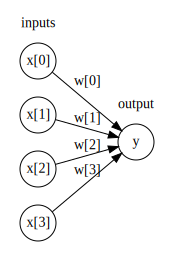

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

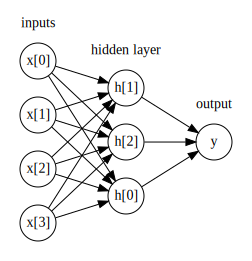

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

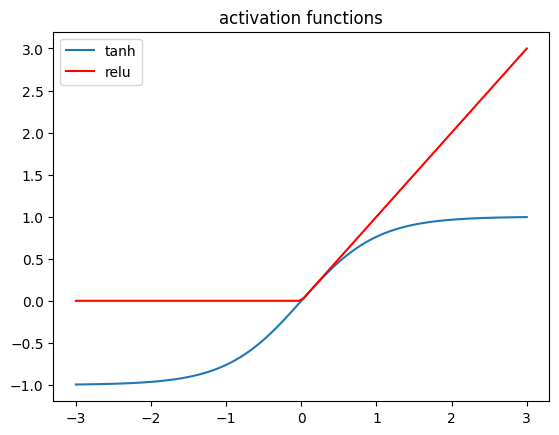

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu", c='r')
plt.legend(loc="best")
plt.title("activation functions")
plt.show()

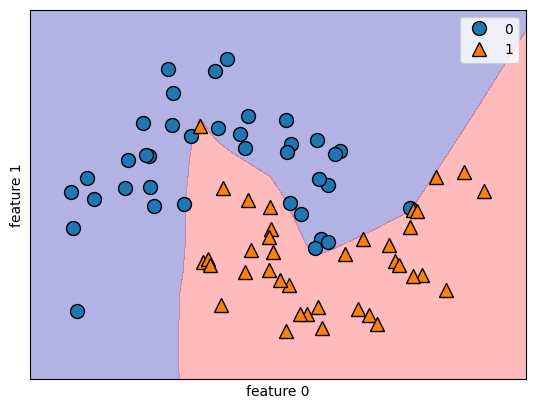

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend()
plt.show()

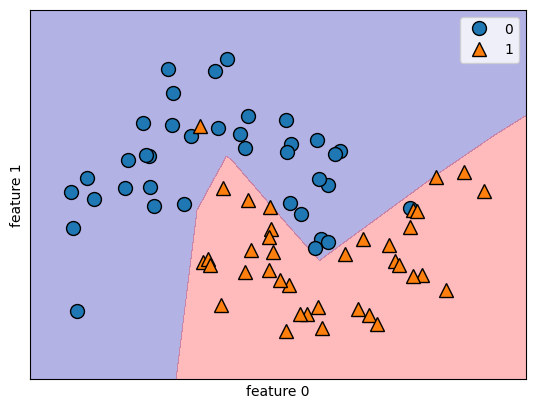

In [ ]:
from sklearn.neural_network import MLPClassifier

mpl_reduced = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[4, 10])
mpl_reduced.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mpl_reduced, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


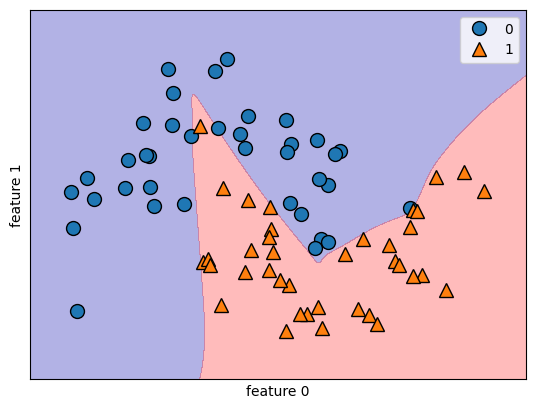

In [ ]:
### using tan for the mlp

mpl_tan = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[5, 10], activation='tanh')
mpl_tan.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mpl_tan, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

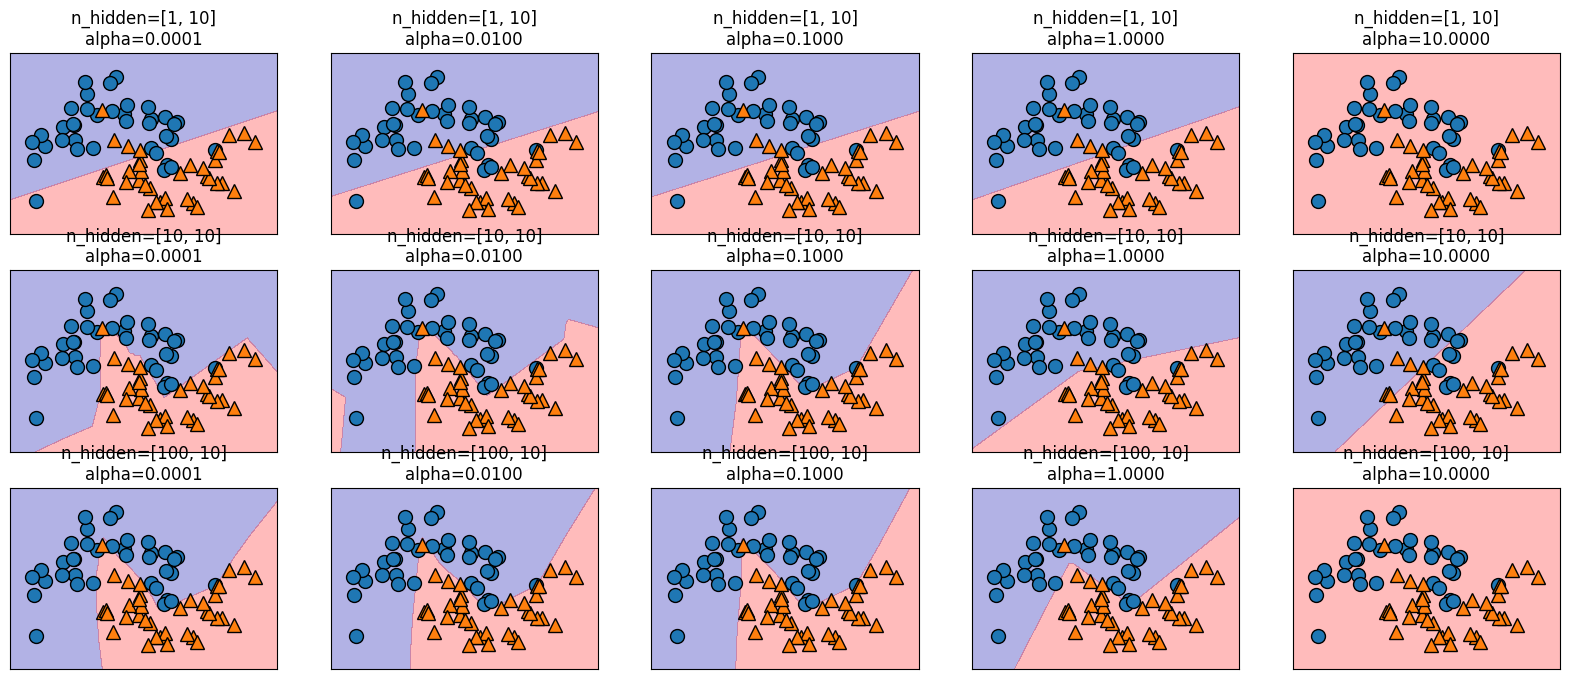

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [1, 10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1, 10, 100]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, 10], alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, 10]\nalpha={:.4f}".format(n_hidden_nodes, alpha))

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [ ]:
### scale the data

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mpl = MLPClassifier(random_state=0)
mpl.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mpl.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mpl.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mpl_itr = MLPClassifier(max_iter=1000, random_state=0)
mpl_itr.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mpl_itr.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mpl_itr.score(X_test_scaled, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [ ]:
mlp_generalize = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp_generalize.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp_generalize.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp_generalize.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


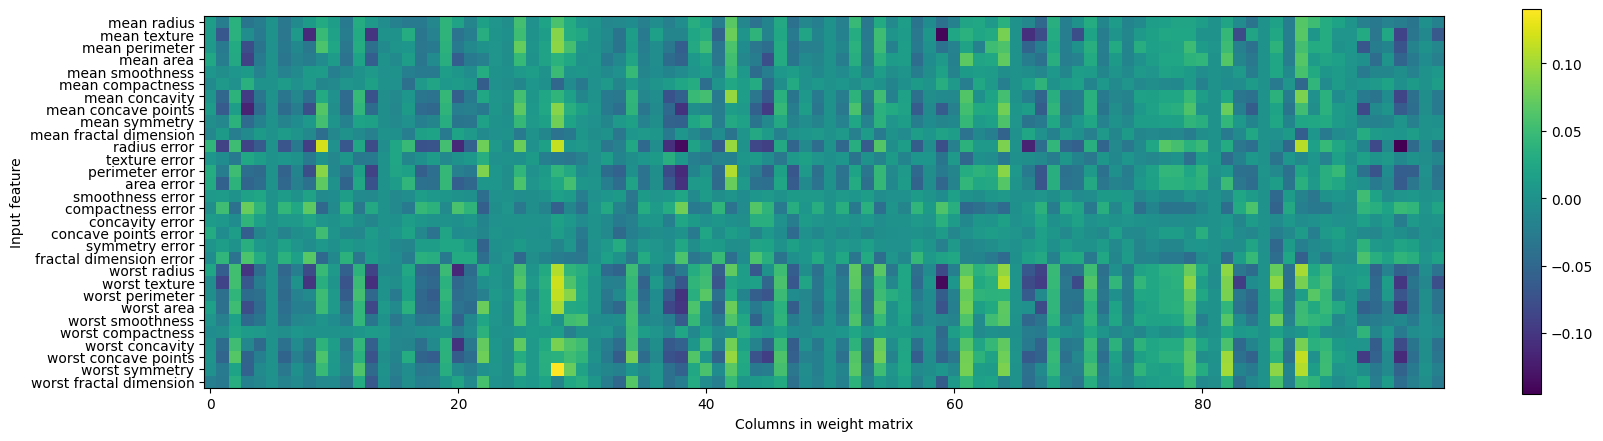

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp_generalize.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

In [ ]:
### uncertainty estimates from classification

from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
print("unique classes: {}".format(np.unique(y)))
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

## build the model

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train_named)

# Changed 'descision_function' to 'decision_function'
gbrt.score(X_test, y_test_named), gbrt.score(X_train, y_train_named)

unique classes: [0 1]


(0.88, 0.9333333333333333)

In [ ]:
gbrt.decision_function(X_test)

array([ 0.84722642, -0.27530052, -0.91007893, -0.70480402,  0.84722642,
        0.49477605, -1.31938641,  0.84722642,  0.79201614,  0.49477605,
       -1.65349586,  0.84722642,  0.84722642, -0.70480402,  0.49477605,
       -1.42334247,  0.77160421, -0.5900496 ,  0.84722642,  0.84722642,
        0.84722642,  0.06875347,  0.41621698, -1.6081886 , -0.39836058])

In [ ]:
print("Threshold decision function:\n {}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n {}".format(gbrt.predict(X_test)))


Threshold decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False  True False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [ ]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0])

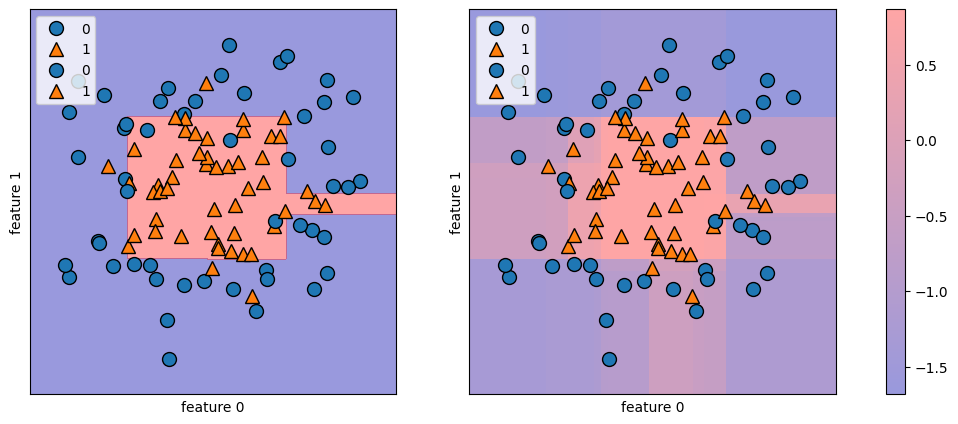

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(loc="upper left")
axes[1].legend(loc="upper left")
plt.show()


In [ ]:
### predicting probability

print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [ ]:
gbrt.predict_proba(X_test)

array([[0.300015  , 0.699985  ],
       [0.56839371, 0.43160629],
       [0.71301631, 0.28698369],
       [0.66925202, 0.33074798],
       [0.300015  , 0.699985  ],
       [0.3787691 , 0.6212309 ],
       [0.7890796 , 0.2109204 ],
       [0.300015  , 0.699985  ],
       [0.31173593, 0.68826407],
       [0.3787691 , 0.6212309 ],
       [0.83936297, 0.16063703],
       [0.300015  , 0.699985  ],
       [0.300015  , 0.699985  ],
       [0.66925202, 0.33074798],
       [0.3787691 , 0.6212309 ],
       [0.80586188, 0.19413812],
       [0.31613219, 0.68386781],
       [0.64337653, 0.35662347],
       [0.300015  , 0.699985  ],
       [0.300015  , 0.699985  ],
       [0.300015  , 0.699985  ],
       [0.4828184 , 0.5171816 ],
       [0.39742235, 0.60257765],
       [0.83315975, 0.16684025],
       [0.59829371, 0.40170629]])

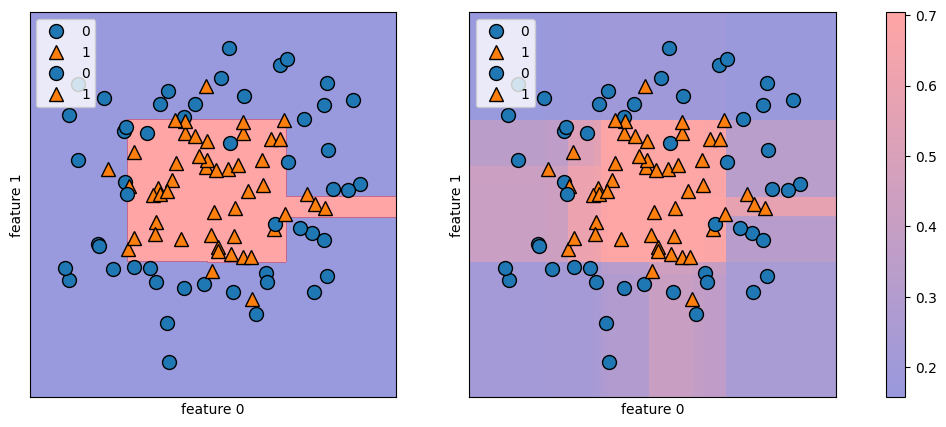

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(loc="upper left")
axes[1].legend(loc="upper left")

In [ ]:
### uncertainty in the multiclass classification
## decision_function and predict proba to the iris data set

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
print("Argmax of decision function:\n {}".format(gbrt.decision_function(X_test)))



Decision function shape: (38, 3)
Argmax of decision function:
 [[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89710742 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89710742 -0.77671169  1.17829848]
 [ 1.16113086 -0.80789044 -0.82827067]
 [ 1.16113086 -0.80789044 -0.82827067]
 [ 1.16113086 -0.80789044 -0.82827067]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89120824 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89120824 -0.77671169  1.19653416]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89763468 -0.76462979  1.14132741]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89120824 -0.77671169  1.19653416]
 

In [ ]:
print("argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))


argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
print("Predicted probabilities :\n{}".format(gbrt.predict_proba(X_test)))
print("Sums:{}".format(gbrt.predict_proba(X_test).sum(axis=1)))

Predicted probabilities :
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]
 [0.10217718 0.78840034 0.10942248]
 [0.09763381 0.11012538 0.79224081]
 [0.10217718 0.78840034 0.10942248]
 [0.10217718 0.78840034 0.10942248]
 [0.09905185 0.11172485 0.78922331]
 [0.78347147 0.10936745 0.10716108]
 [0.78347147 0.10936745 0.10716108]
 [0.78347147 0.10936745 0.10716108]
 [0.78347147 0.10936745 0.10716108]
 [0.10217718 0.78840034 0.10942248]
 [0.09815477 0.1100618  0.79178343]
 [0.10217718 0.78840034 0.10942248]
 [0.10217718 0.78840034 0.10942248]
 [0.09815477 0.1100618  0.79178343]
 [0.78347147 0.10936745 0.10716108]
 [0.10178234 0.11626145 0.78195621]
 [0.78347147 0.10936745 0.10716108]
 [0.09815477 0.1100618  0.79178343]
 [0.09957954 0.11165941 0.78876105]
 [0.09815477 0.1100618  0.79178343]
 [0.09818072 0.11005864 0.79176065]
 [

In [ ]:
print("argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
gbrt.predict(X_train)

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])